<a href="https://colab.research.google.com/github/Naitik1245/Machine_Learning/blob/main/Heart_Diseases_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(20,10)

In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


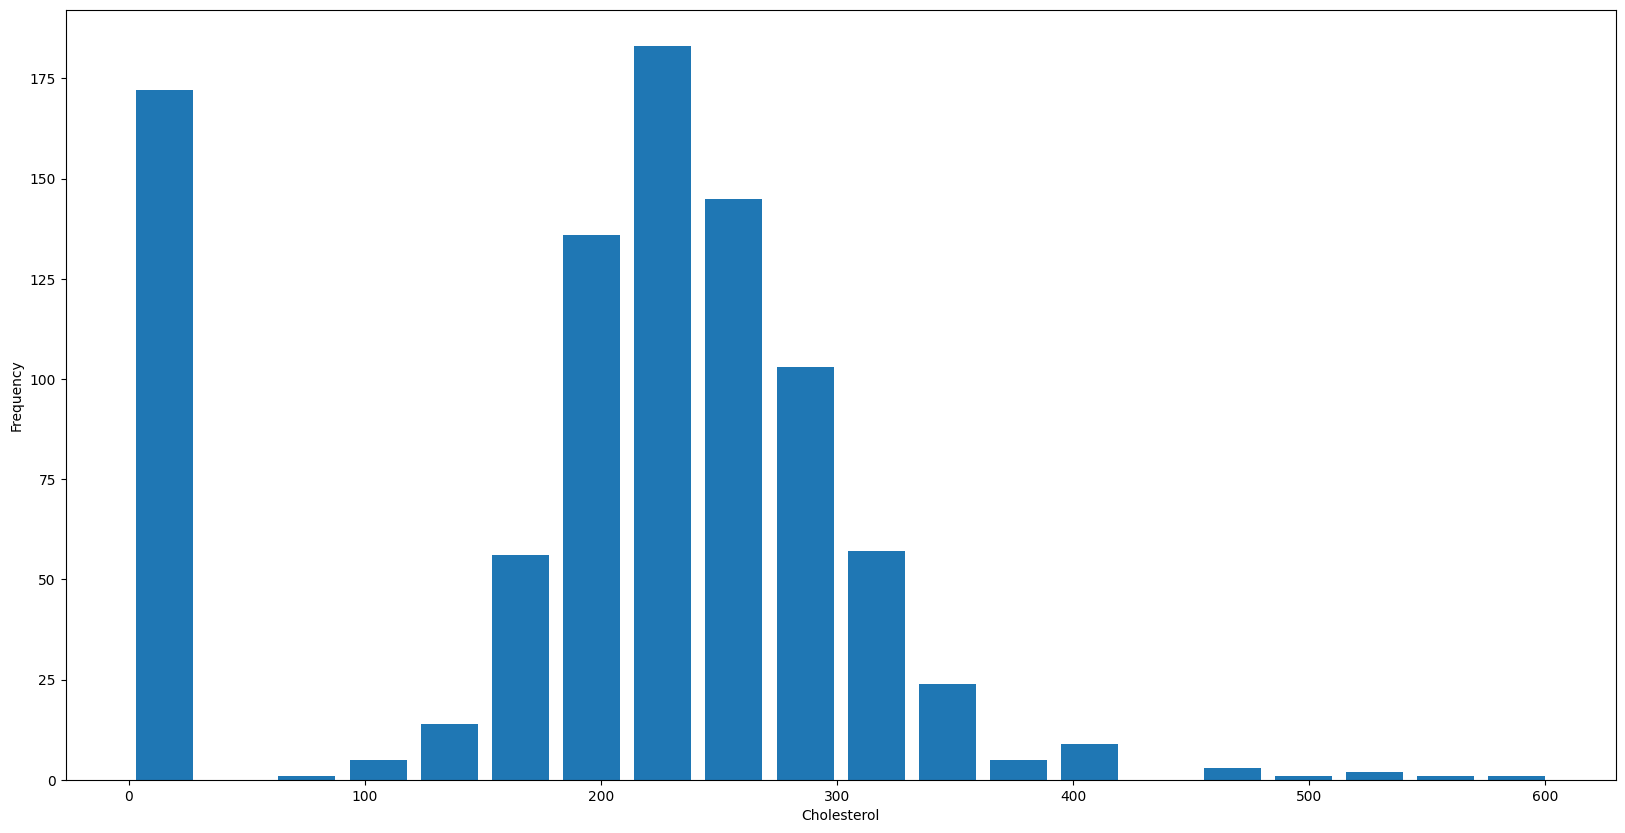

In [ ]:
plt.hist(df.Cholesterol,bins=20,rwidth=0.8)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.shape

(918, 12)

In [ ]:
df.Cholesterol.std()

109.38414455220337

Outlier Detection  Removal
[link text](https://)

In [ ]:
upper_limit=df.Cholesterol.mean() + 3*df.Cholesterol.std()
upper_limit

526.9519979267626

In [ ]:
lower_limit=df.Cholesterol.mean() - 3*df.Cholesterol.std()
lower_limit

-129.35286938645763

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Yes, the standard deviation method is primarily good for bell curve (normal) data because it leverages the properties of a normal distribution. For your right-skewed cholesterol data, it’s less effective, and you’re better off using the IQR method or other robust techniques. If you have a dataset that’s clearly normal (symmetric, bell-shaped), the standard deviation method is a solid choice, but always verify the distribution first (e.g., with a histogram, Q-Q plot, or skewness test).

In [ ]:
Q1=df['Cholesterol'].quantile(0.25)
Q3=df['Cholesterol'].quantile(0.75)

In [ ]:
Q1

173.25

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

93.75

In [ ]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
lower_bound

32.625

In [ ]:
upper_bound

407.625

In [ ]:
df.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
df = df[(df['Cholesterol'] >= lower_bound) & (df['Cholesterol'] <= upper_bound)]

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.shape

(735, 12)

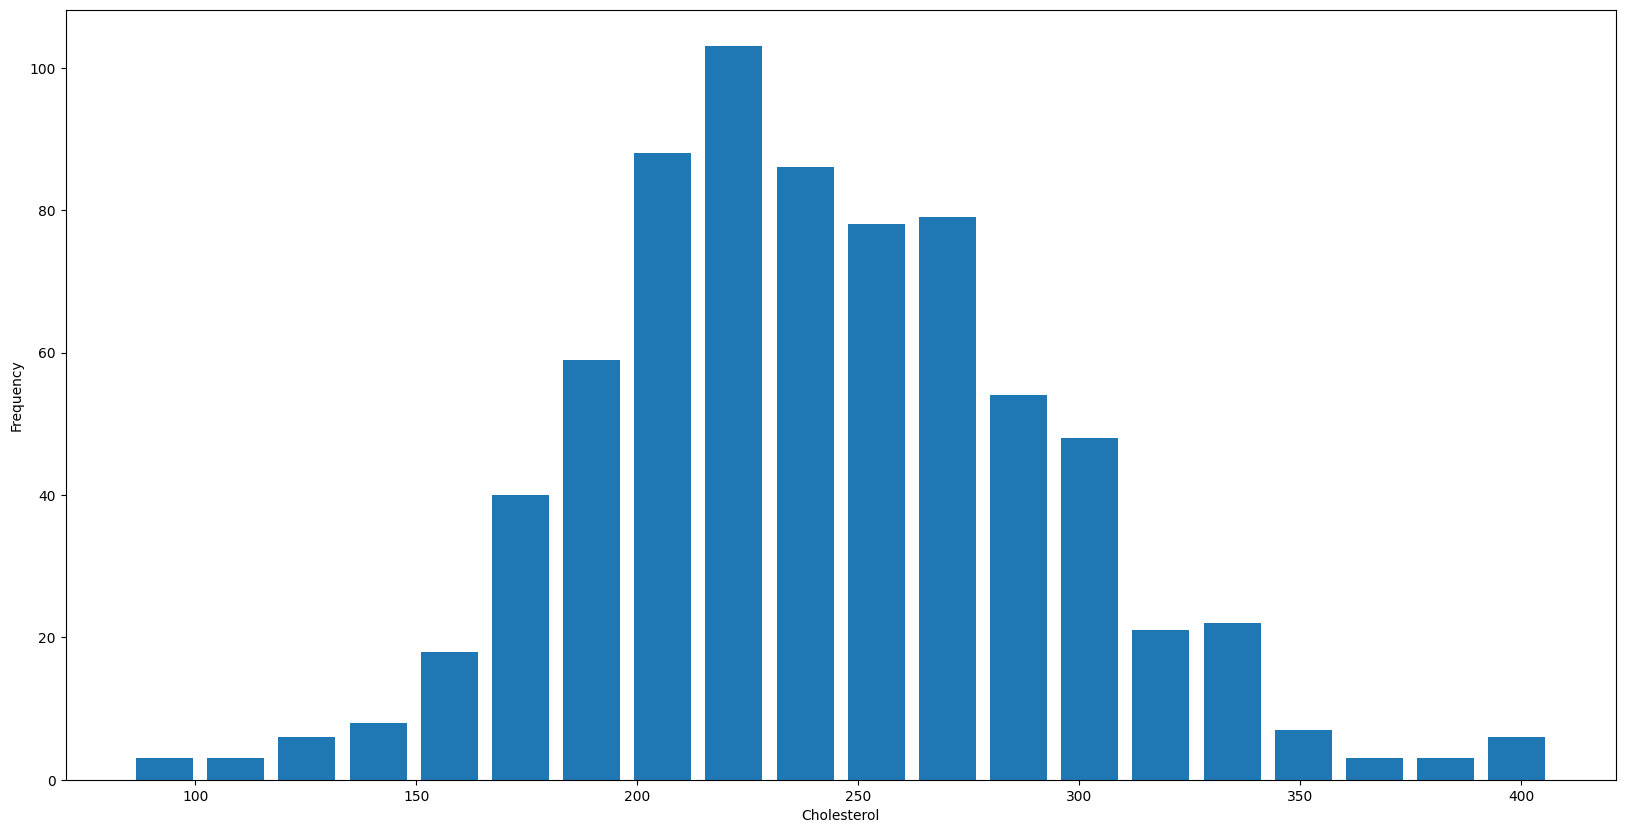

In [ ]:
plt.hist(df.Cholesterol,bins=20,rwidth=0.8)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

This was just for cholestrol now for all of the other numericly active columns

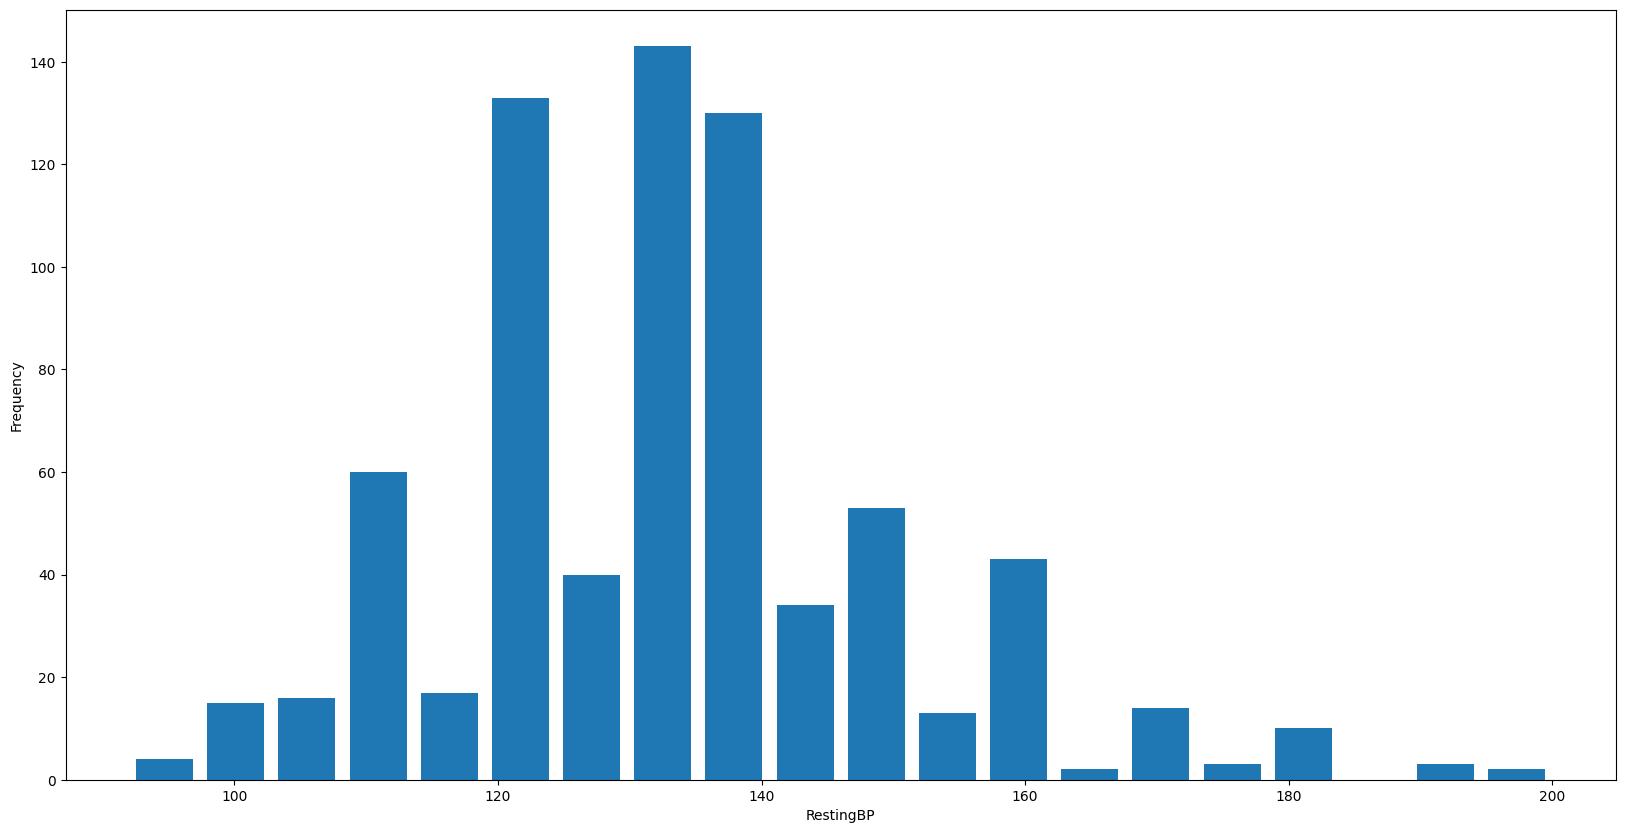

In [ ]:
plt.hist(df.RestingBP,bins=20,rwidth=0.8)
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.show()

Now for this histogram we will be using std deviation method

In [ ]:
mean=df['RestingBP'].mean()
std=df['RestingBP'].std()

In [ ]:
mean


133.065306122449

In [ ]:
std

17.348364664943226

In [ ]:
df['RestingBP'].min()

92

In [ ]:
df['RestingBP'].max ()

200

In [ ]:
lower_BP=mean-3*std
upper_BP=mean+3*std

In [ ]:
upper_BP

185.11040011727866

In [ ]:
df=df[(df['RestingBP']>=lower_BP)&(df['RestingBP']<=upper_BP)]

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df['RestingBP'].max()

180

In [ ]:
df['RestingBP'].min()

92

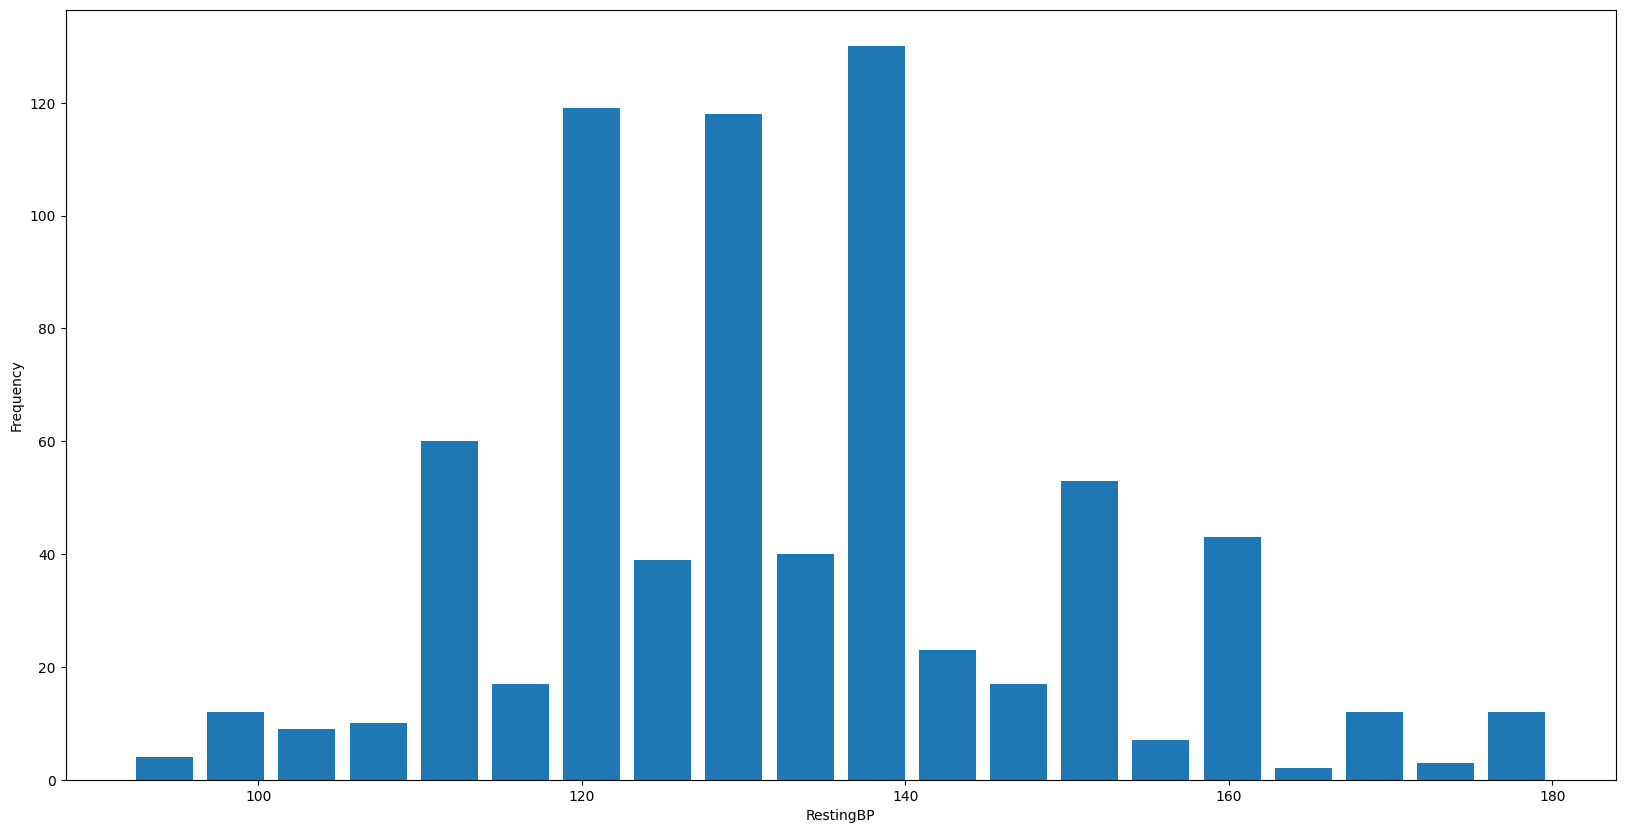

In [ ]:
plt.hist(df.RestingBP,bins=20,rwidth=0.8)
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['z_score_resting_BP'] = (df.RestingBP - df.RestingBP.mean()) / df.RestingBP.std()

<ipython-input-206-98d51c63a37d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score_resting_BP'] = (df.RestingBP - df.RestingBP.mean()) / df.RestingBP.std()


In [ ]:
df['RestingBP'].describe()

,RestingBP
count,730.000000
mean,132.645205
std,16.640436
min,92.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,180.000000


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_score_resting_BP
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.441983
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1.643875
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-0.158963
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.321794
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1.042929


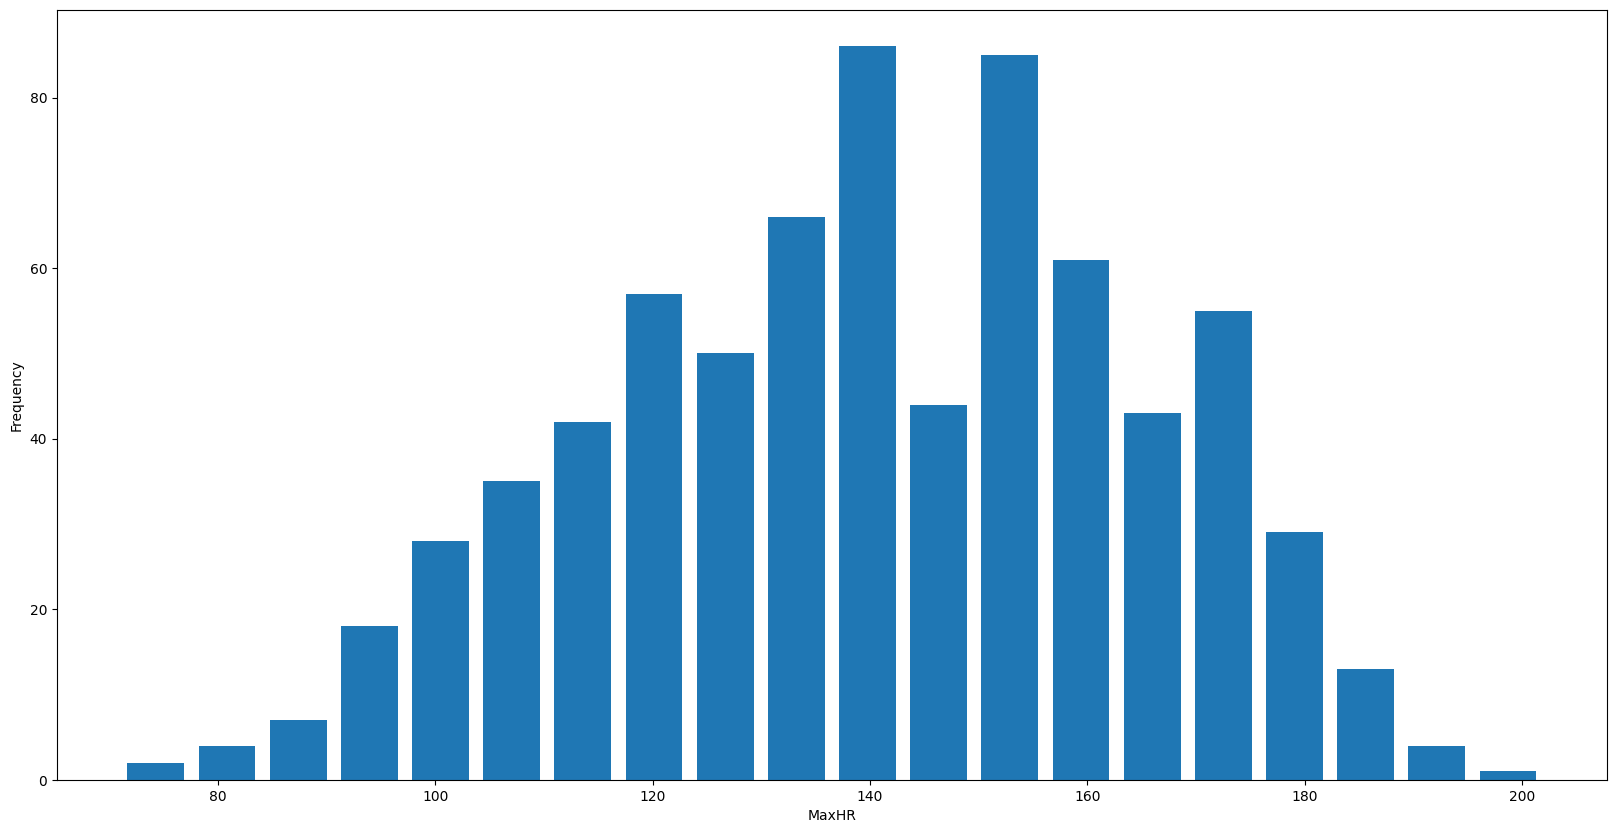

In [ ]:
plt.hist(df.MaxHR,bins=20,rwidth=0.8)
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

In [ ]:
mean_maxHR=df.MaxHR.mean()
std_maxHR=df.MaxHR.std()
print(df.MaxHR.min())
print(df.MaxHR.max())


71
202


In [ ]:
lower_HR=mean_maxHR-3*std_maxHR
upper_HR=mean_maxHR+3*std_maxHR
print(lower_HR,upper_HR)

66.85710444618367 213.63056678669307


In [ ]:
df=df[(df['MaxHR']>=lower_HR)&(df['MaxHR']<=upper_HR)]

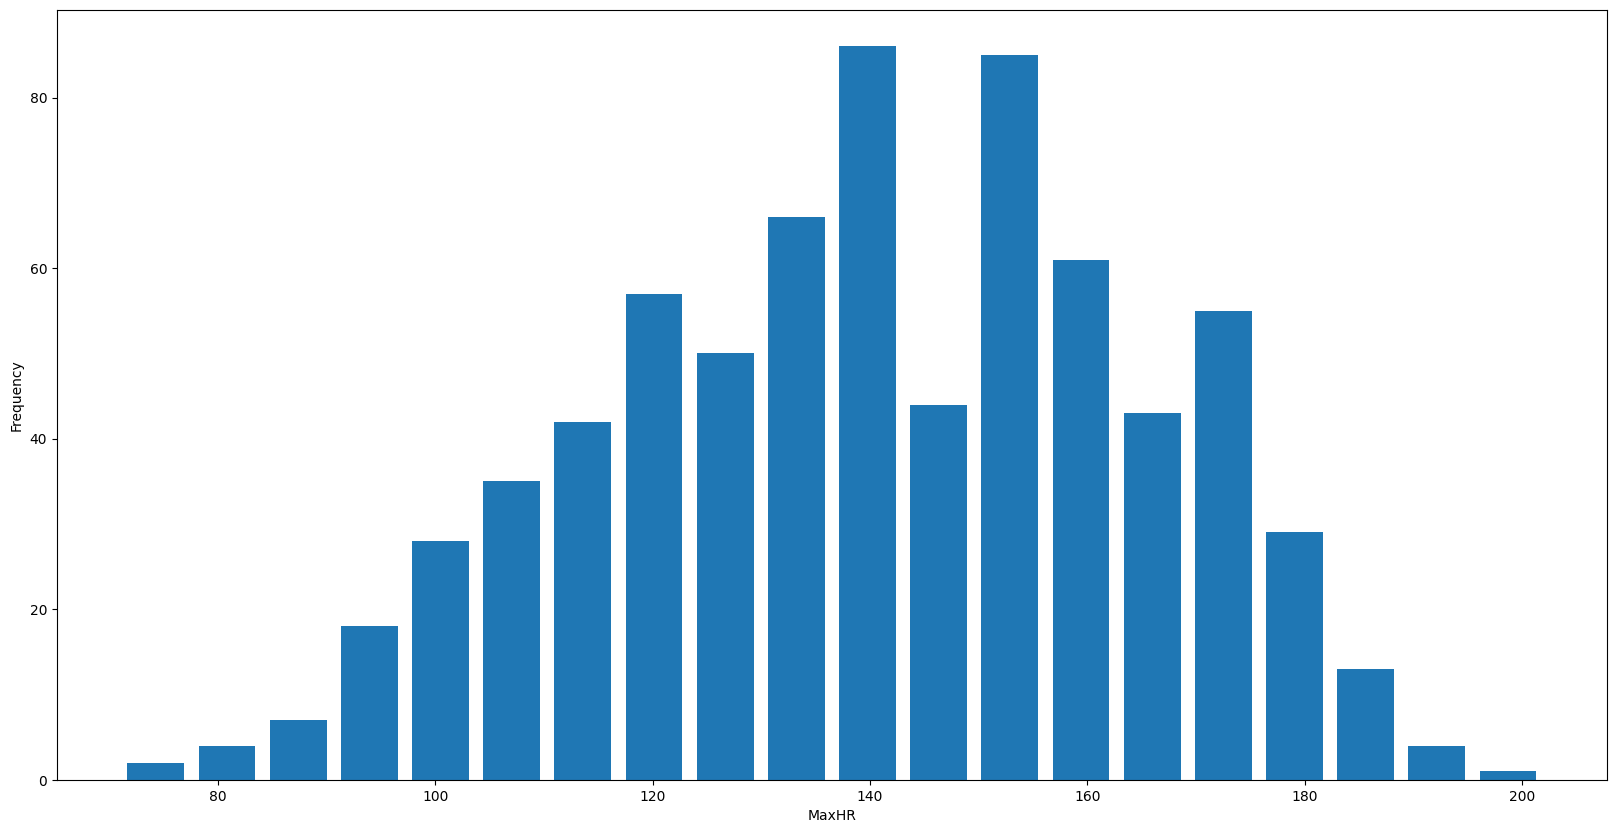

In [ ]:
plt.hist(df.MaxHR,bins=20,rwidth=0.8)
plt.xlabel('MaxHR')
plt.ylabel('Frequency')
plt.show()

This one showed that there was no outlier Detection Required here


In [ ]:
df.ExerciseAngina.replace(
    {
        'N':0,
        'Y':1,
    },
    inplace=True
)

df.RestingECG.replace(
    {
        'Normal':1,
        'ST':2,
        'LVH':3,
    },
    inplace=True
)
df.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

<ipython-input-214-fe89ed524c33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.ExerciseAngina.replace(
<ipython-input-214-fe89ed524c33>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.ExerciseAngina.replace(
<ipython-input-214-fe89ed524c33>:9: FutureWarning: A value is trying to be set on 

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,z_score_resting_BP
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0,0.441983
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1,1.643875
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0,-0.158963
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1,0.321794
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0,1.042929


In [ ]:
df1=pd.get_dummies(df,drop_first=True)

In [ ]:
df1.head()
y=df1.HeartDisease

In [ ]:
y=df1.HeartDisease
df1=df1.drop('HeartDisease',axis='columns')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df1)
x_scaled

array([[-1.35809247,  0.44228631,  0.93923854, ...,  1.86508113,
        -0.54251842, -0.24393961],
       [-0.41088785,  1.64500192, -1.18972712, ..., -0.53616971,
         1.84325537, -0.24393961],
       [-1.67382735, -0.1590715 ,  0.82204777, ...,  1.86508113,
        -0.54251842, -0.24393961],
       ...,
       [ 0.43107182, -0.1590715 , -2.14678508, ..., -0.53616971,
        -0.54251842, -0.24393961],
       [ 0.43107182, -0.1590715 , -0.0959466 , ...,  1.86508113,
        -0.54251842, -0.24393961],
       [-1.56858239,  0.32201475, -1.2873861 , ..., -0.53616971,
         1.84325537, -0.24393961]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8835616438356164

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x_scaled)

In [ ]:
print(x_pca)

[[ 2.03291458e+00  1.66935669e+00 -1.64568257e+00 ...  4.39131321e-01
  -8.00104307e-02  2.12069494e-01]
 [-1.60932770e-01  1.98944816e+00  1.46761942e+00 ... -4.59921841e-04
  -4.37148710e-01 -2.84615122e-02]
 [ 1.42110681e+00  3.75658263e-01 -1.69924466e+00 ... -4.22828456e-01
  -2.01591888e+00  1.02429450e+00]
 ...
 [-1.11002510e+00 -1.50561562e+00 -3.70617563e-01 ... -5.59233184e-01
   5.18118688e-01 -7.97002954e-02]
 [ 1.33452210e+00  9.00435270e-01 -4.89337592e-01 ...  3.61217233e-01
   5.83646031e-02  2.76229664e-01]
 [ 1.97369265e+00  7.74447480e-01  1.62287925e+00 ... -2.87724974e-01
   5.77086925e-02  1.37141841e-02]]


In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=30)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.7945205479452054

In [ ]:
pca.n_components_

12